# Kaggle team name: vijf5!

# Members:
1. Jesse Coenraad -> JesseCoenraad
2. Jordan van Sintanneland -> JordanvanSint
3. Casper Priem -> CasperPriem
4. Jassar Hasiba -> UrClades

### Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

### Data inladen

In [15]:
train = pd.read_csv('train.csv', parse_dates=True)
test = pd.read_csv('test.csv')

# 1. Exploratieve Data Analyse

## 1.1 Toon de datatypes en basisstatistieken van iedere kolom

In [16]:
display(train.head())
display(train.info())
display(train.describe())

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_hour   16637 non-null  object 
 1   holiday     16637 non-null  int64  
 2   weathersit  16637 non-null  int64  
 3   temp        16637 non-null  float64
 4   atemp       16637 non-null  float64
 5   hum         16637 non-null  float64
 6   windspeed   16637 non-null  float64
 7   cnt         16637 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.0+ MB


None

,holiday,weathersit,temp,atemp,hum,windspeed,cnt
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,0.028671,1.415580,0.504745,0.482608,0.624756,0.190310,190.477009
std,0.166885,0.637298,0.192369,0.171557,0.193227,0.121915,182.026755
min,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,41.000000
50%,0.000000,1.000000,0.520000,0.500000,0.620000,0.194000,143.000000
75%,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,282.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


### 1.1.1 Valt hier iets op?

- Geen missende waarde
- De 'temp', 'atemp', 'hum' en 'windspeed' zijn al genormaliseerd
- 'date_hour', is geen DateTime data type

### 1.1.2 Beschrijf de kolommen

- date_hour: Je hebt informatie over de periode van 1-1-2011 t/m 30-11-2012, metingen per uur
- holiday: Vakantiedag of geen vakantiedag
- weathersit: Weersituatie:
    1. Helder, licht bewolkt, deels bewolkt
    2. Mistig , mistig en licht bewolkt
    3. Lichte sneeuw, lichte regen, lichte regen en onweer, zwaar bewolkt, lichte regen en zwaar bewolkt
    4. Zware regen,  hagel,  zware mist, sneeuw
- temp: genormaliseerde temperatuur
- atemp: genormaliseerde gevoelstemperatuur
- hum: genormaliseerde luchtvochtigheid
- windspeed: genormaliseerde windsnelheid
- cnt: het aantal dat per uur is verhuurd

## 1.2 Voeg tijdserie elementen toe en gebruik passende visualistaites om relevante patronen zichtbaar te maken.

Hier wordt de 'date_hour' kolom omgezet naar een DateTime data type, zodat er Time Series modellen mee kunnen worden gemaakt.

In [17]:
train['date_hour'] = pd.to_datetime(train['date_hour'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_hour   16637 non-null  datetime64[ns]
 1   holiday     16637 non-null  int64         
 2   weathersit  16637 non-null  int64         
 3   temp        16637 non-null  float64       
 4   atemp       16637 non-null  float64       
 5   hum         16637 non-null  float64       
 6   windspeed   16637 non-null  float64       
 7   cnt         16637 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 1.0 MB


Hier worden extra timeseries features toegevoegd om betere voorspellingen te kunnen maken. Aangezien hier ook naar correlaties wordt gekeken staat dit in de EDA, ondanks het toevoegen van de features zelf beter bij 'Feature Engineering' zou passen.

In [18]:
train['Hour'] = train['date_hour'].dt.hour
train['Day'] = train['date_hour'].dt.dayofweek
train['DayName'] = train['date_hour'].dt.day_name()
train['Month'] = train['date_hour'].dt.month
train['Week'] = train['date_hour'].dt.isocalendar().week
train

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt,Hour,Day,DayName,Month,Week
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0000,16,0,5,Saturday,1,52
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0000,40,1,5,Saturday,1,52
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0000,32,2,5,Saturday,1,52
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0000,13,3,5,Saturday,1,52
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0000,1,4,5,Saturday,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,2012-11-30 19:00:00,0,1,0.32,0.3485,0.66,0.0000,377,19,4,Friday,11,48
16633,2012-11-30 20:00:00,0,1,0.32,0.3485,0.66,0.0000,245,20,4,Friday,11,48
16634,2012-11-30 21:00:00,0,1,0.30,0.3182,0.75,0.0896,183,21,4,Friday,11,48
16635,2012-11-30 22:00:00,0,1,0.30,0.3333,0.75,0.0000,163,22,4,Friday,11,48


Plotten van de target kolom 'cnt' ten opzichte van tijdserie elementen

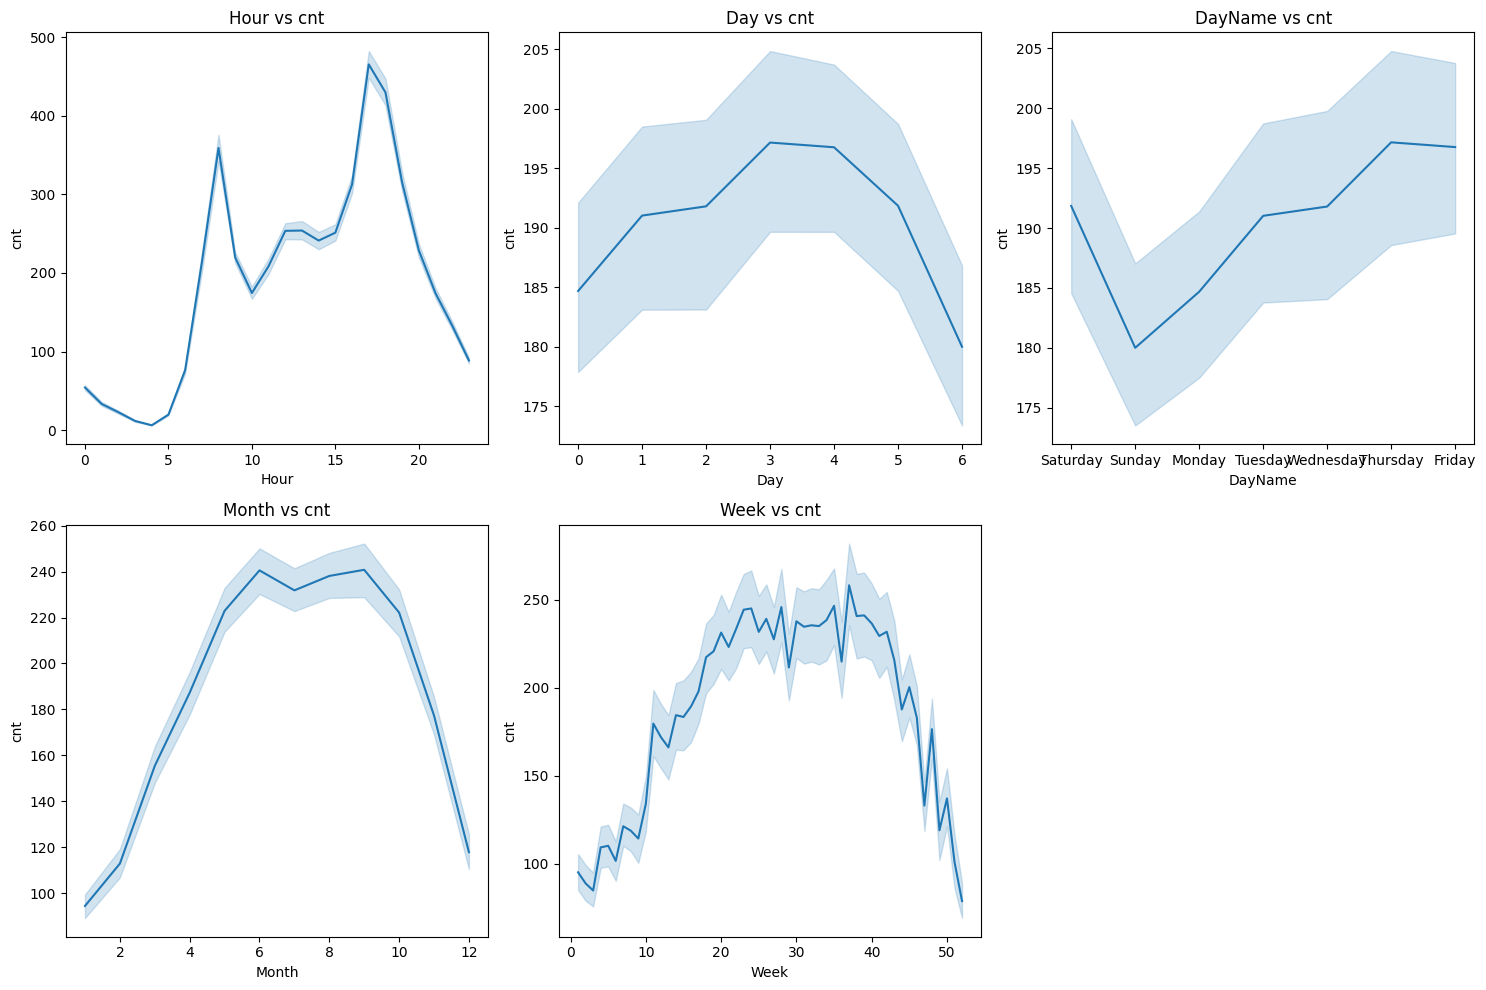

In [19]:
keys = ['Hour', 'Day', 'DayName', 'Month', 'Week']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  

for i, key in enumerate(keys):
    row, col = divmod(i, 3)  
    sns.lineplot(data=train, x=key, y='cnt', ax=axes[row, col])
    axes[row, col].set_title(f'{key} vs cnt')

if len(keys) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()  
plt.show()

### 1.2.2 Valt hier iets op?


**Lineplots**
- Hour:

    Er zijn een opvallend patroon in deze grafiek. Zo zijn er grote pieken in het aantal verhuurde producten rond 8 uur 's-ochtends en 6 uur 's-savonds.

- Day/DayName:

    Het valt op dat op de zondag het aantal verhuurde producten aanzienlijk lager is dan de rest van de dagen. 

- Month/Week:

    In het begin en het einde van het jaar is het aantal verhuurde producten een stuk lager dan in het midden van het jaar (winterperiode dus lager, zomerperiode dus hoger).

## 1.3 Relaties

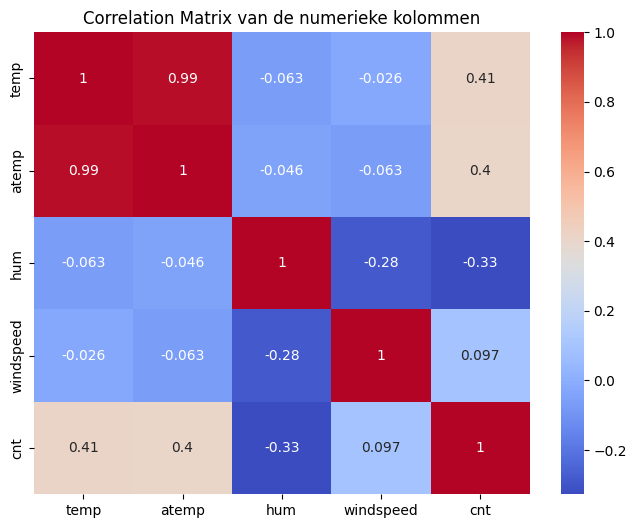

In [62]:
# Correlatiematrix van de numerieke kolommen
plt.figure(figsize=(8, 6))
correlation_matrix = train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix van de numerieke kolommen')
plt.show()

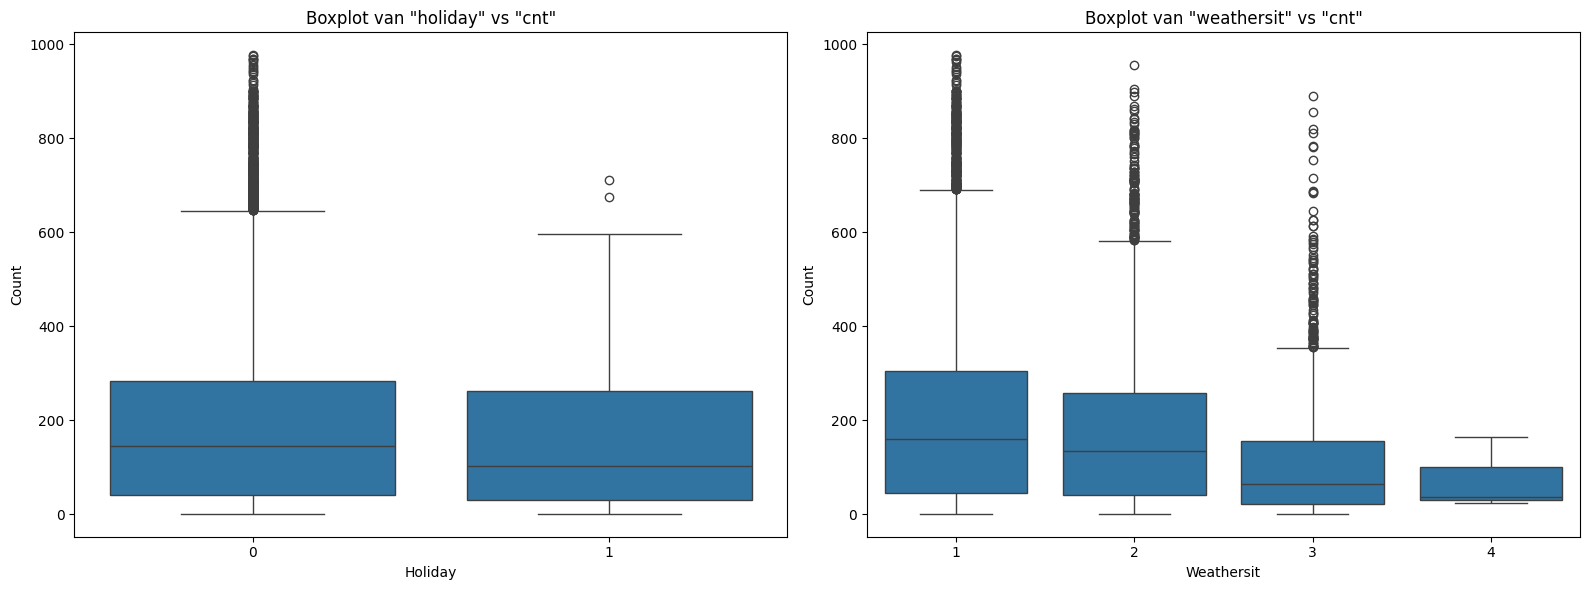

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='holiday', y='cnt', data=train, ax=axes[0])
axes[0].set_title('Boxplot van "holiday" vs "cnt"')
axes[0].set_xlabel('Holiday')
axes[0].set_ylabel('Count')

sns.boxplot(x='weathersit', y='cnt', data=train, ax=axes[1])
axes[1].set_title('Boxplot van "weathersit" vs "cnt"')
axes[1].set_xlabel('Weathersit')
axes[1].set_ylabel('Count')

# Layout netjes maken
plt.tight_layout()

# Toon de grafieken
plt.show()

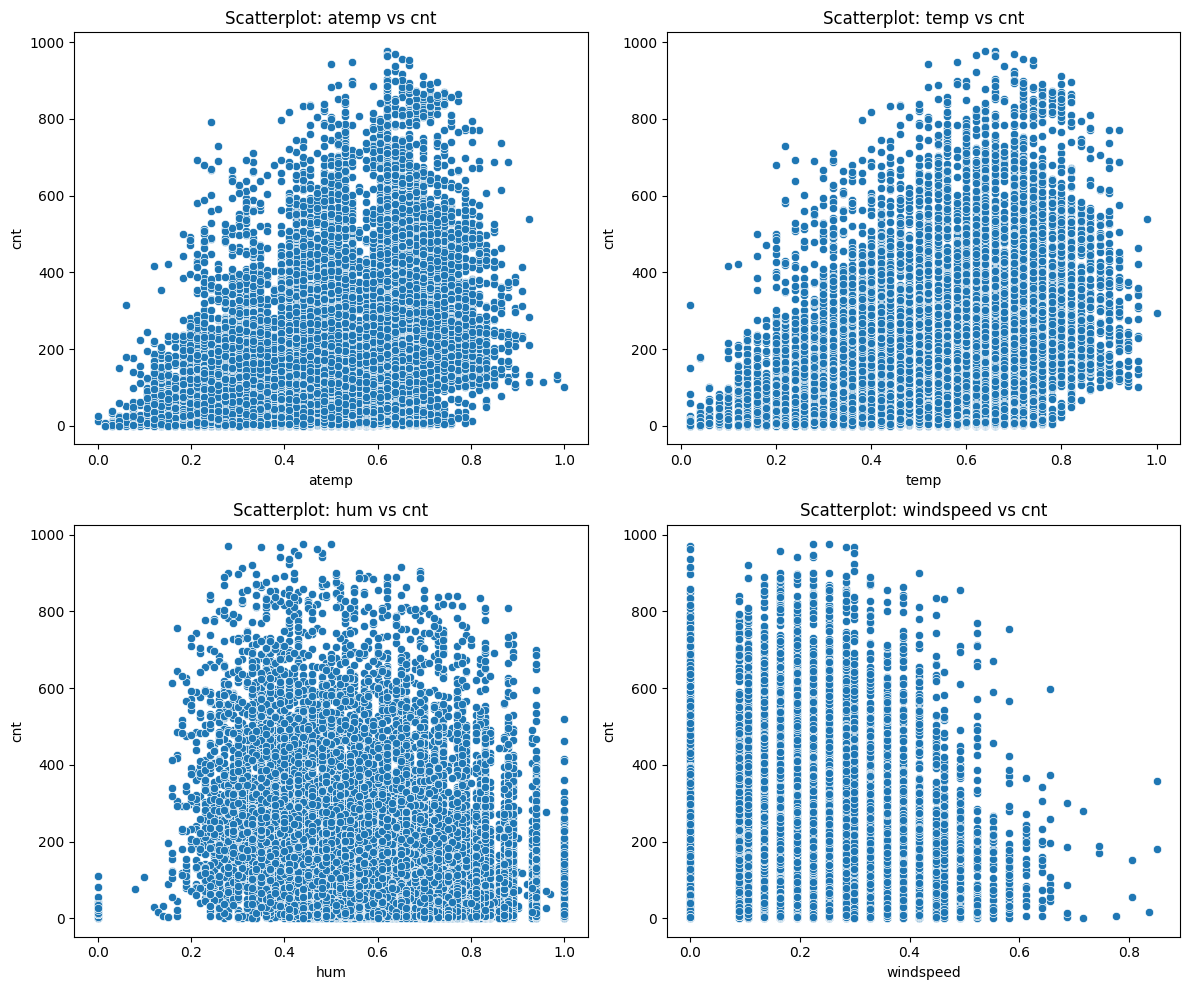

In [71]:
keys = ['atemp', 'temp', 'hum', 'windspeed']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, key in enumerate(keys):
    row, col = divmod(i, 2)  
    sns.scatterplot(data=train, x=key, y='cnt', ax=axes[row, col])
    axes[row, col].set_title(f'Scatterplot: {key} vs cnt')

# Ruimte tussen subplots aanpassen
plt.tight_layout()
plt.show()

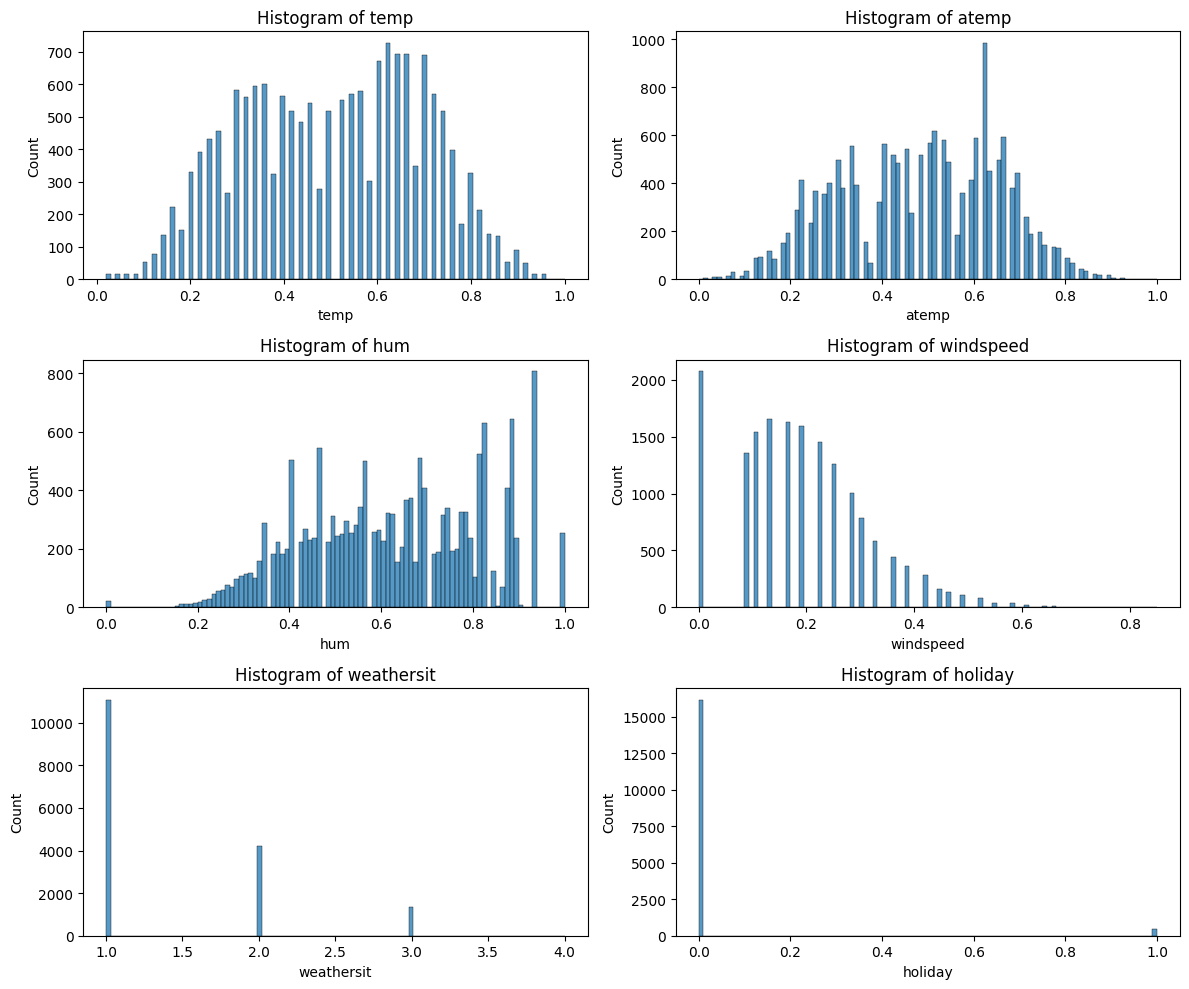

In [73]:
keys = ['temp', 'atemp', 'hum', 'windspeed', 'weathersit', 'holiday']

fig, axes = plt.subplots(3,2 , figsize=(12, 10))

axes = axes.flatten()

for i, key in enumerate(keys):
    sns.histplot(data=train, x=key, bins=100, ax=axes[i])
    axes[i].set_title(f'Histogram of {key}')

plt.tight_layout()
plt.show()

### 1.3.1 Valt hier iets op?

**Correlatiematrix**
- De kolommen 'temp' en 'atemp' zijn zeer sterk gecorreleerd (waarde van 0.99). Dit is vrij logisch, aangezien beide genormaliseerde waardes met betrekking tot de temperatuur bevatten.

- De kolommen 'temp en 'atemp zijn enigzins positief gecorreleerd  (waarde van 0.4 en 0.41) met de 'cnt' kolom. Dit kan erop wijzen dat hogere temperaturen leiden tot een hoger aantal verhuurde producten.

- De 'hum' kolom heeft een negatieve correlatie (waarde van -0.33) met de 'cnt' kolom. Hieruit kan worden afgeleid dat een hogere luchtvochtigheid wellicht een negatieve invloed heeft op het aantal verhuurde producten.

- De 'windspeed' kolom heeft een lichte positieve correlatie (waarde van 0.097) met de 'cnt' kolom. Hieruit valt niet heel veel af te leiden, aangezien de correlatiecoëfficient dicht bij 0 ligt.


**Boxplots**
- 'Weathersit' vs 'cnt': <br>
    De 'weathersit' is ordinaal gemeten. Dit houdt in dat er bij '1' goed weer is en als het richting '4' gaat er slecht weer is (zoals in de kolombeschrijving bovenaan het notebook is beschreven). In de boxplots is te zien dat het aantal verhuurde producten bij '1' vrij hoog is, maar naarmate het richting de '4' gaat steeds verder afneemt. Dit laat zien dat bij slechtere weersomstandigheiden het aantal verhuurde producten lager is.
    
- 'Holiday' vs 'cnt': <br>
    Naast het feit dat er een stuk meer '0' (geen vakantiedag), dan '1' (wel vakantiedag) waardes zijn, zijn er voor de rest geen opvallende dingen in deze grafiek.
    

**Scatterplots**
- Atemp/Temp: <br>
    Het valt op dat bij een hogere temperatuur er meer producten worden verhuurd ten opzichte van een lage temperatuur.

- Hum: <br>
    In deze grafiek is geen duidelijke correlatie / trend te zien.

- Windspeed: <br>
    Vanaf ongeveer 0.3 (genormaliseerde windspeed) is er een enigzins dalende trend in het aantal verhuurde producten.





**Histplots**

- Temp/Atemp: <br>
    Beide kolommen zijn relatief normaal verdeeld. Het valt wel op dat bij de 'atemp' kolom er een piek zit op de 0.6.

- Hum: <br>
    Het is relatief normaal verdeeld, maar het valt wel op dat bij een hogere humidity het aantal verhuurde producten hoger ligt.

- Windspeed: <br>
    Deze grafiek is left skewed. In de grafiek is te zien dat naarmate de windspeed hoger is, het aantal verhuurde producten afneemt.


- Weathersit: <br>
    Ten eerste valt het op dat er bijna geen '4' waardes aanwezig zijn (in totaal 3 na het checken met value_counts). Ook is te zien dat er minder producten worden verhuurd, naarmate de weersomstandigheden verslechteren.

- Holiday: <br>
    Naast het feit dat het aantal vakantiedager lager is dan het aantal niet vakantiedagen (wat logisch is), is het voor de rest niet iets opvallends in de grafiek te zien.

### 1.4 Decompose

Om de gehele data te visualieren wordt hier een lineplot gemaakt van de 'date_hour' kolom ten opzichte van de 'cnt' kolom.

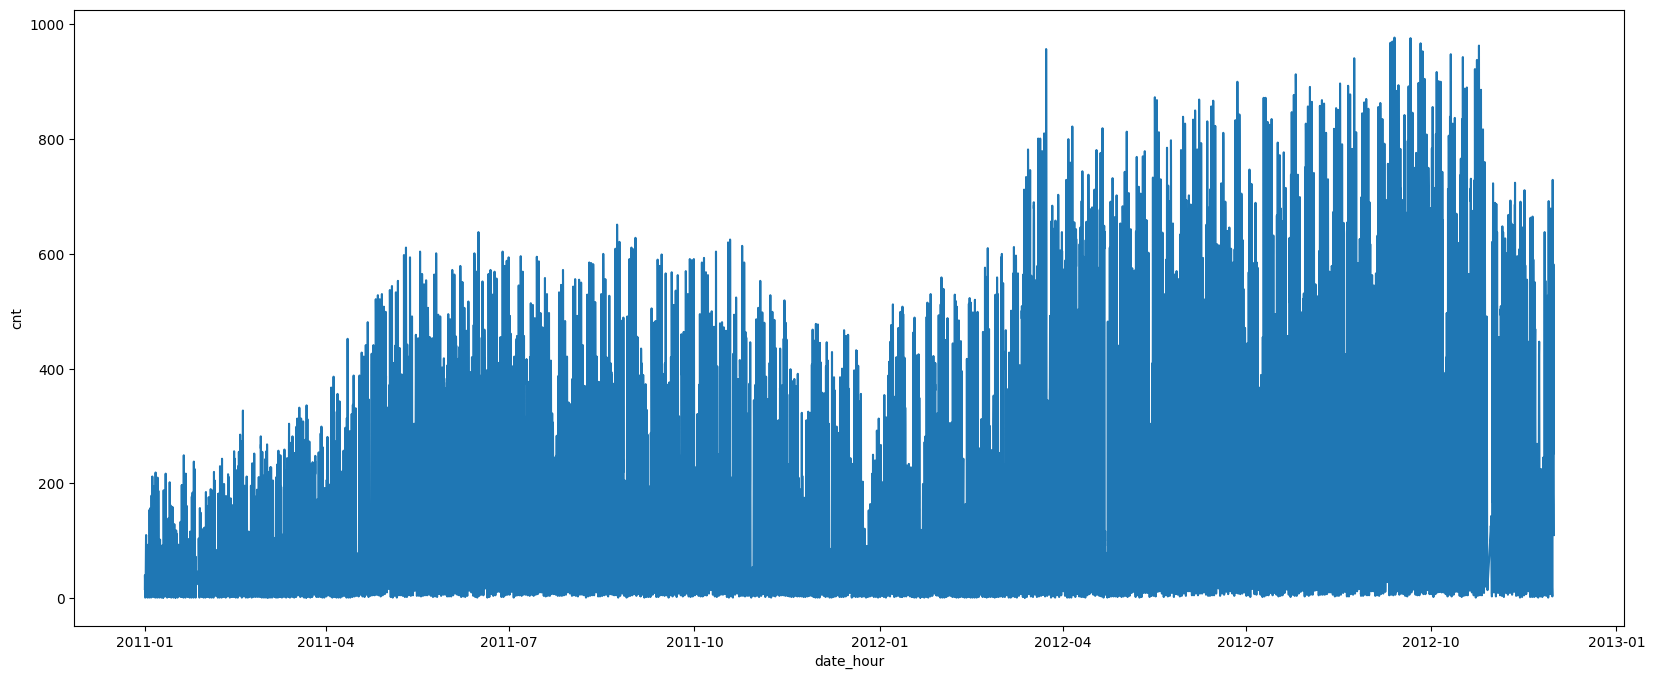

In [21]:
# Lineplot from 'date_hour' vs 'cnt'	
plt.figure(figsize=(20, 8))
sns.lineplot(data=train, x='date_hour', y='cnt')
plt.show()

In [22]:
# 'date_hour' to index
train_decomp = train.set_index('date_hour')
train_decomp = train_decomp['cnt']

In [23]:
# Splitting time to only retain three months of data
split_date = '2011-04-01 00:00:00'
train_decomp_split = train_decomp[:split_date]

In [24]:
# Decomposition of time series
def decompose_ts(series, period=None):


    series_decomp = sm.tsa.seasonal_decompose(series, period=period)
    trend = series_decomp.trend
    seasonal = series_decomp.seasonal
    resid = series_decomp.resid

    return trend, seasonal, resid

trend, seasonal, resid = decompose_ts(train_decomp, period=24)

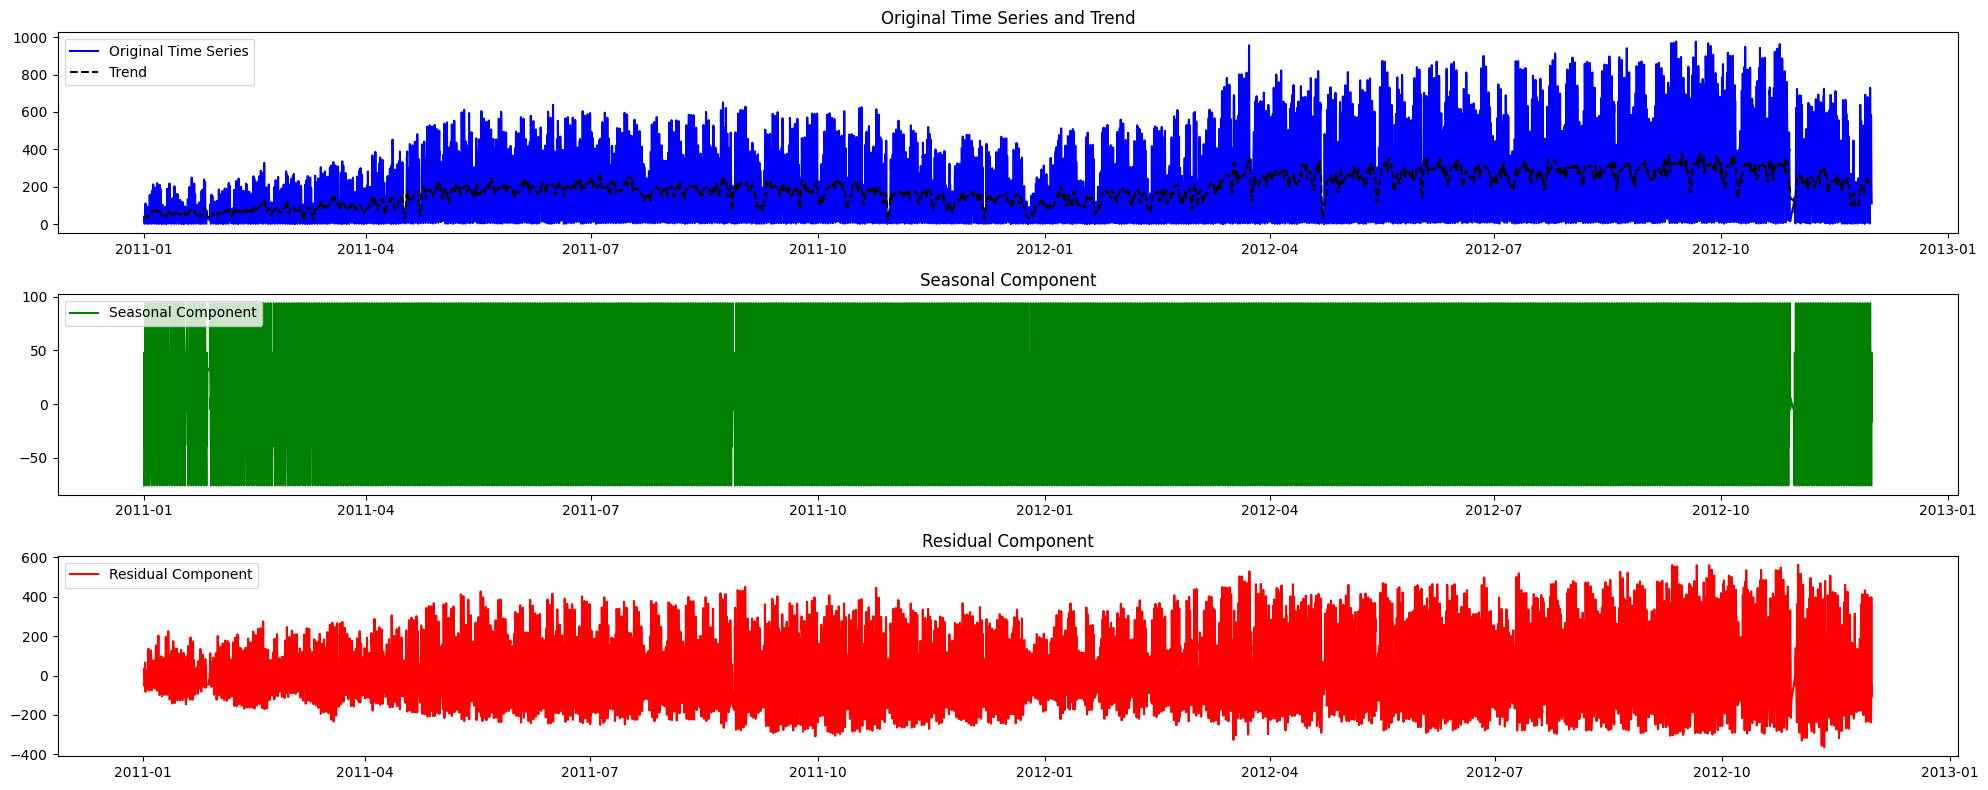

In [25]:
def plot_ts(series, trend, seasonal, residuals):
    """
    Plots the original time series, trend, seasonal, and residual components.

    Parameters:
        series (pandas.Series): Series with a DateTime index representing the original time series.
        trend (pandas.Series): Time series representing the trend component.
        seasonal (pandas.Series): Time series representing the seasonal component.
        residuals (pandas.Series): Time series representing the residual component.
    """

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))

    # Plot the original time series and trend
    axes[0].plot(series.index, series, color='blue', label='Original Time Series')
    axes[0].plot(series.index, trend, color='black', linestyle='dashed', label='Trend')
    axes[0].set_title('Original Time Series and Trend')
    axes[0].legend()

    # Plot the seasonal component
    axes[1].plot(series.index, seasonal, color='green', label='Seasonal Component')
    axes[1].set_title('Seasonal Component')
    axes[1].legend()

    # Plot the residual component
    axes[2].plot(series.index, residuals, color='red', label='Residual Component')
    axes[2].set_title('Residual Component')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

plot_ts(train_decomp, trend, seasonal, resid)


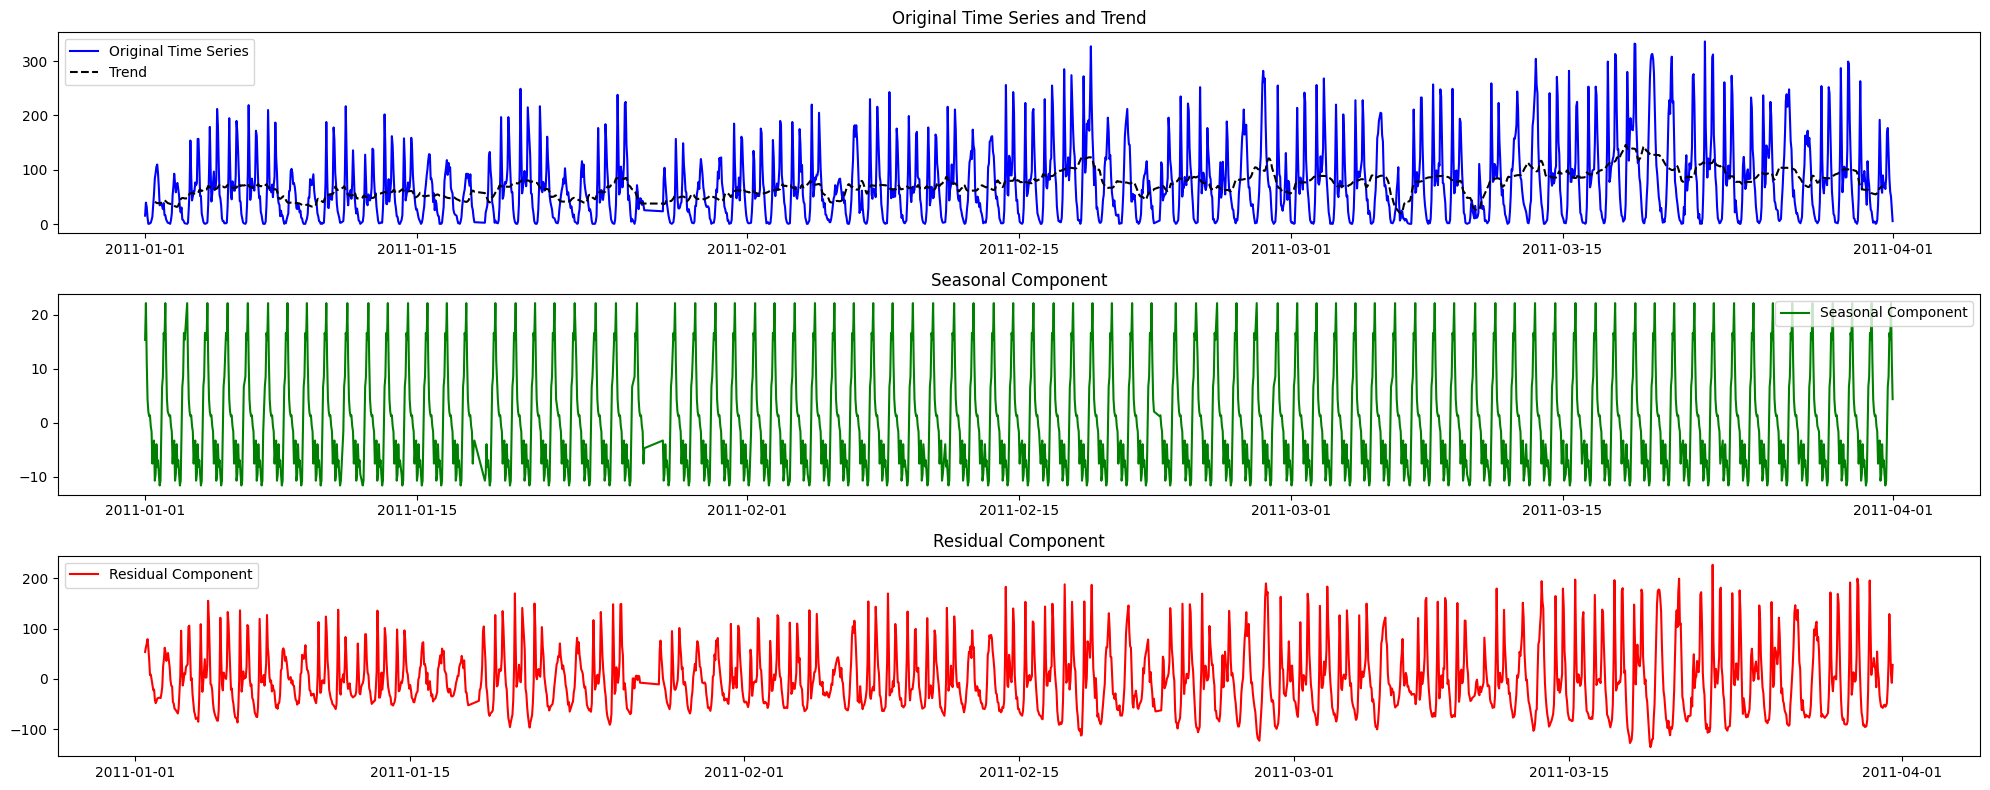

In [26]:
trend2, seasonal2, resid2 = decompose_ts(train_decomp_split, period=24)
plot_ts(train_decomp_split, trend2, seasonal2, resid2)

- Lineplot:

    - In deze grafiek is zowel een stijgende tend als seizoensgebondenheid in de data te zien.

- Decompose:

    Eerst wordt de gehele timeseries degecomposed. Doordat de dataset data bevat over een periode van twee jaar en dit per uur is gemeten, zijn er vrij veel datapunten. In de eerste decompose is enkel de trend goed af te lezen, maar de 'seasonal' grafiek is niet duidelijk. Daarom worden de eerste drie maanden van de data geselecteerd en vervolgens opnieuw gedecomposed om meer duidelijkheid over de seizoensgebondenheid te krijgen.
    
    - Trend: De trendgrafiek laat zien dat er een enigzins stijgende trend is in de data. Dit wordt in zowel de 'trend' grafiek van de decompose als in de orignele lineplot over twee jaar beide duidelijk. 
    - Seasonal: Er is duidelijk sprake van seizoensgebondenheid (per dag).  (Per dag)
    - Residual: Er is nog veel data dat nog niet verklaard is.

## 1.5 Stationariteit controleren

Aangezien een 'stationairy' dataset een belangrijke voorwaarde is voor 'ARIMA' timeseries modellen, wordt hieronder de Dickey-Fuller test uitgevoerd om dit te controleren.

In [27]:
series = train['cnt']

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(series)

# Print the test results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -6.625164793721729
p-value: 5.901288668679143e-09
Critical Values:
   1%: -3.430744160906401
   5%: -2.8617142032973706
   10%: -2.5668627239973634


Uit de test komt een p-value van 5.90, wat betekent dat de data non-stationary is. Daarom wordt hieronder de data aangepast (in een nieuwe variable) om het stationairy te maken, zodat de bij bepaalde time series modellen gebruik van kan worden gemaakt.

In [28]:
#Stationary maken

# First-order differencing
series_diff = series.diff().dropna()

# Perform the ADF test on the differenced series
adf_result_diff = adfuller(series_diff)

print("ADF Statistic (Differenced):", adf_result_diff[0])
print("p-value (Differenced):", adf_result_diff[1])


ADF Statistic (Differenced): -29.583404888071367
p-value (Differenced): 0.0


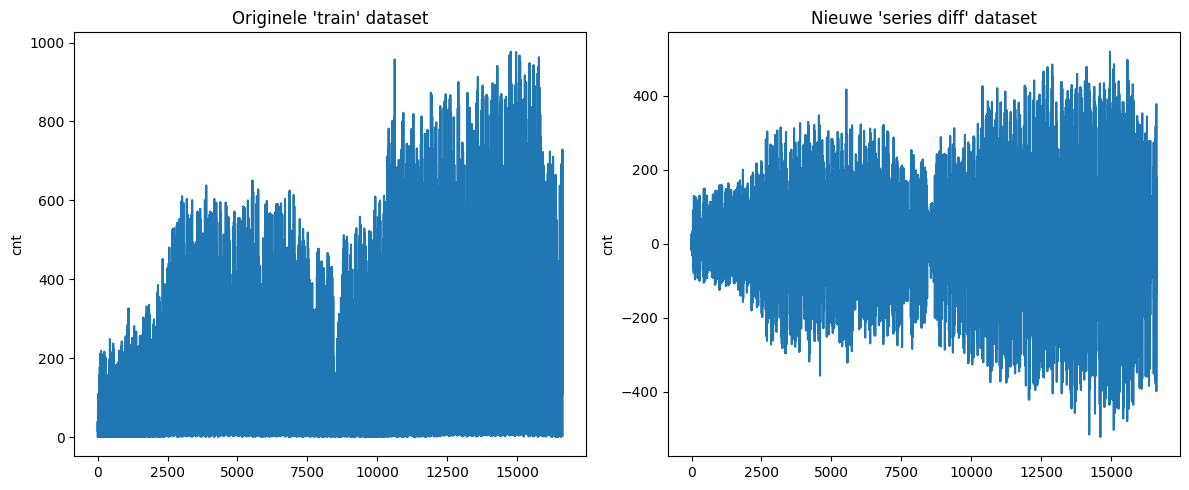

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=train['cnt'], ax=axes[0])
axes[0].set_title("Originele 'train' dataset")

sns.lineplot(data=series_diff, ax=axes[1])
axes[1].set_title("Nieuwe 'series diff' dataset")

plt.tight_layout()
plt.show()

Aan de linkerkant is de orignele 'non-stationairy' dataset te zien en aan de rechterkant de nieuwe 'stationairy' dataset, na het gebruik maken van de first-order differencing techniek. Hieronder zal data nogmaals worden gedecomposed om te controleren of de 'seasonality' ook uit de dataset is gehaald.

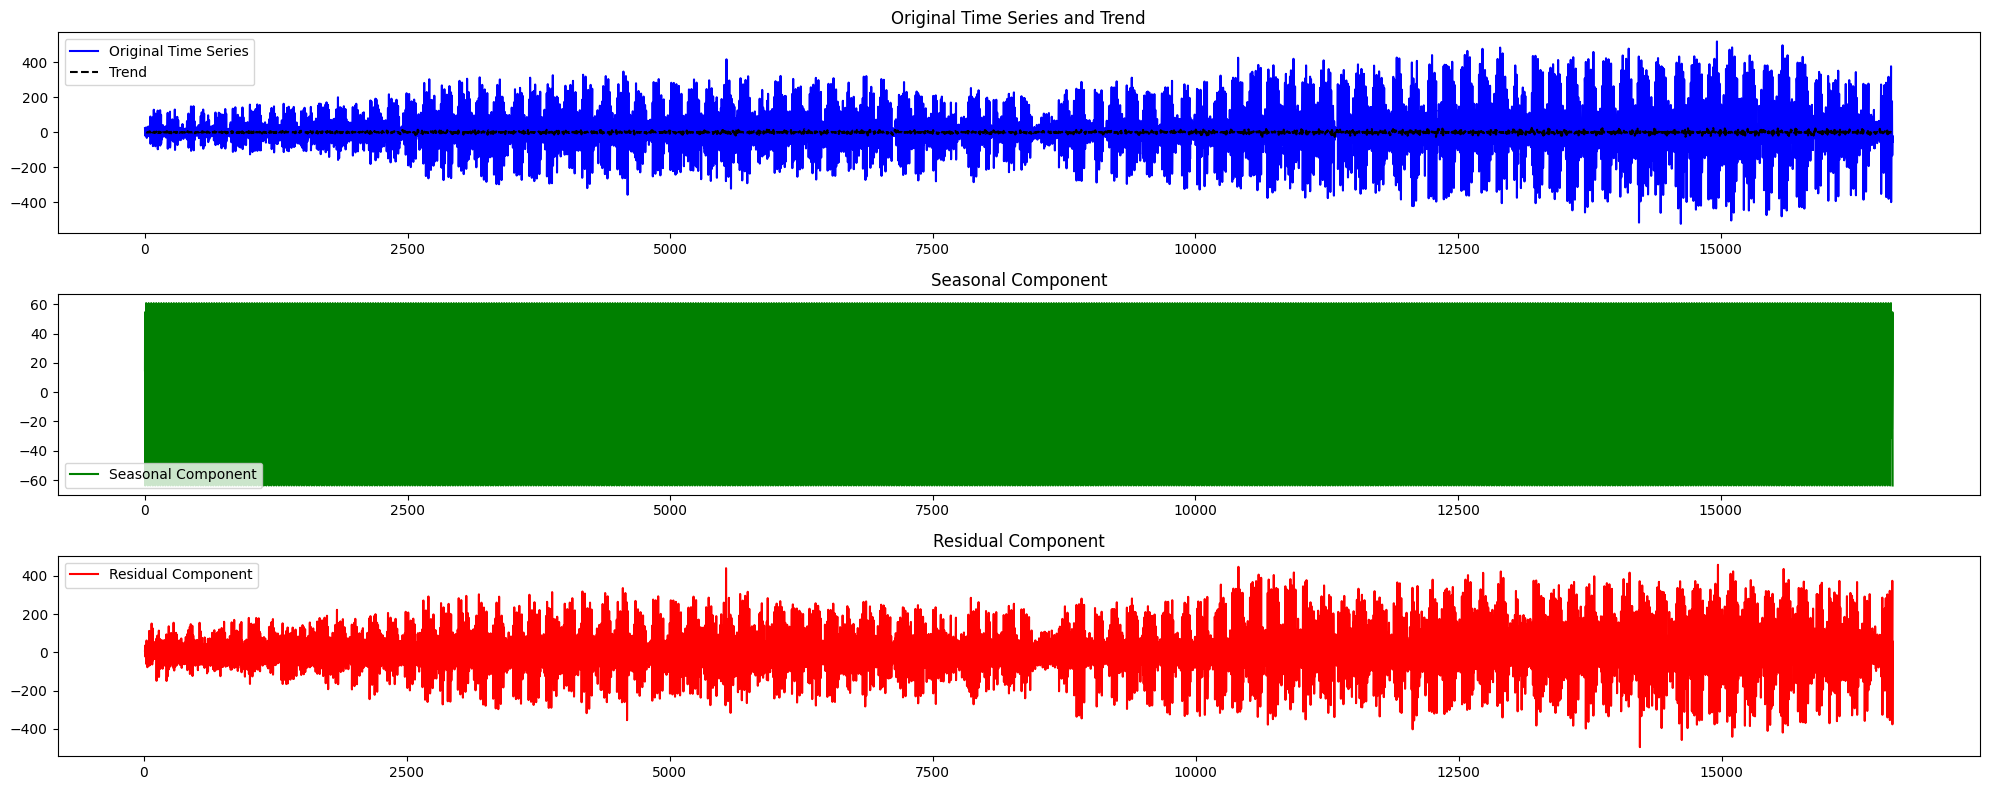

In [31]:
trend3, seasonal3, resid3 = decompose_ts(series_diff, period=24)
plot_ts(series_diff, trend3, seasonal3, resid3)

In de bovenstaande grafiek is te zien dat zowel de trend als het seasonality component uit de dataset zijn gehaald, wat betekent dat er nu sprake is van een 'stationairy' dataset.

## 1.6 Beschrijf wat de belangrijkste bevindingen zijn van de EDA

# 2. Data-voorbereiding

## 2.1 Verwijder indien nodig niet relevante kolommen

In [35]:
train = train.drop(columns=['DayName', 'Month'])

In [36]:
display(train.head())

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt,Hour,Day,Week
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,16,0,5,52
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,40,1,5,52
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,32,2,5,52
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,13,3,5,52
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,1,4,5,52


### 2.1.1 Leg uit waarom deze wel of niet verwijderd zijn

- Dayname:

    Deze kolom wordt verwijderd aangezien het geen 'int' of 'float' is en het praktisch dezelfde data weergeeft als de 'day' kolom.

- Month:

    Deze kolom wordt verwijderd, omdat het hetzelfde laat zien als de 'week' kolom, maar de 'week' kolom heeft in dit geval meer waardes. Hierom hebben we besloten om deze van de twee te behouden. DOor de 'month' kolom te verwijderen, zorgen we er ook voor dat er geen sprake is multicollineariteit. 

## 2.2 Vul eventuele missende waarden in of verwijder ze. Voor time series kan interpolatie een nuttige methode zijn.

In [37]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_hour   16637 non-null  datetime64[ns]
 1   holiday     16637 non-null  int64         
 2   weathersit  16637 non-null  int64         
 3   temp        16637 non-null  float64       
 4   atemp       16637 non-null  float64       
 5   hum         16637 non-null  float64       
 6   windspeed   16637 non-null  float64       
 7   cnt         16637 non-null  int64         
 8   Hour        16637 non-null  int32         
 9   Day         16637 non-null  int32         
 10  Week        16637 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(4), int32(2), int64(3)
memory usage: 1.2 MB


None

### 2.2.1 Leg uit waarom er voor wat gekozen is

Er is geen sprake van missende waardes

## 2.3 Kijk of er outliers zijn

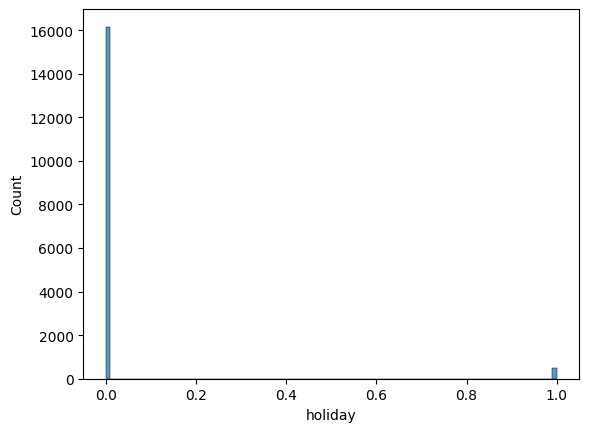

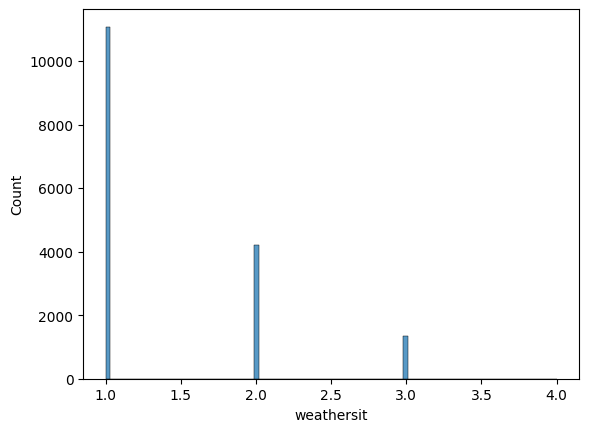

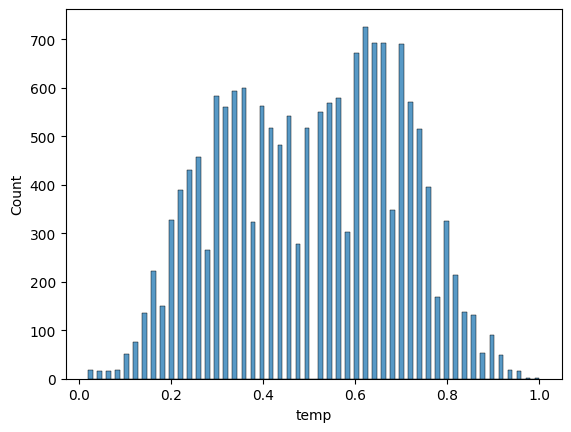

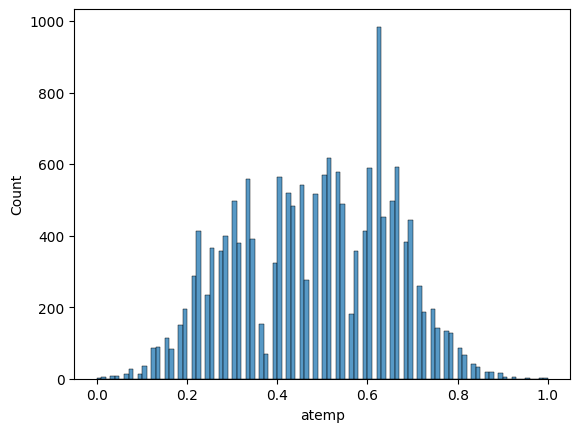

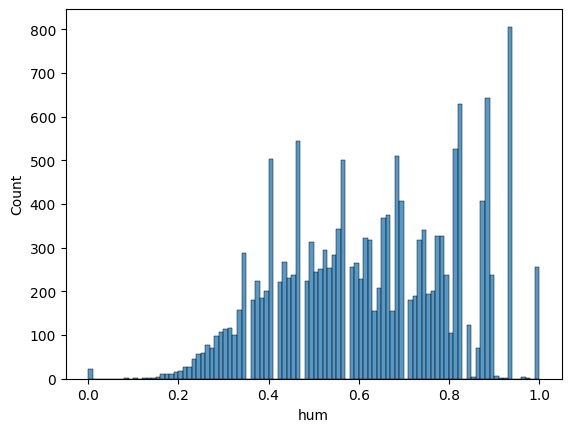

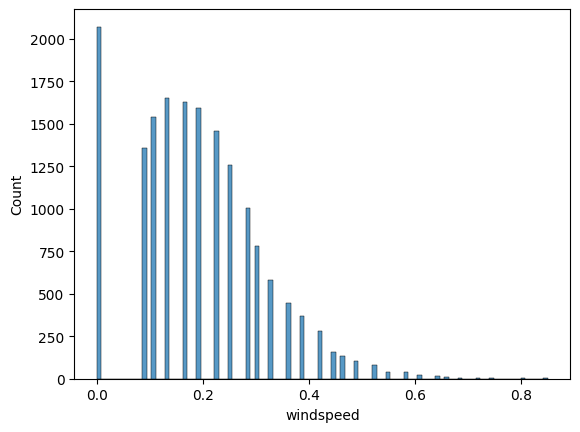

In [38]:
#histplot
keys = ['holiday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

for key in keys:
    sns.histplot(data=train, x=key, bins=100)
    plt.show()


### 2.3.1 Verwijder of corrigeer deze indien nodig

### 2.3.2 Leg uit waarom deze keuze is gemaakt

## 2.4 Schaal/normaliseer de data indien nodig

### 2.4.1 Leg uit waarom voor deze methode is gekozen en voor welke modellen dit uitmaakt

## 2.5 Data sampling indien nodig

### 2.5.1 Leg uit waarom dit wel/niet nodig is en welke methode wordt gebruikt

# 3. Time series feature engineering

Deze opdracht hangt sterk samen met de opdracht 3 (modelleren). Je zult na het toevoegen van features moeten gaan modelleren om te achterhalen wat de invloed van de features is. Daarna zul je waarschijnlijk weer teruggaan naar deze opdracht om nieuwe features uit te proberen. Dit is een iteratief proces. Zorg ervoor dat je uitwerking duidelijk maakt hoe jullie tot de uiteindelijke keuze voor de features en model(len) zijn gekomen

## 3.1 Voeg tijdserie features toe aan de dataset

## 3.2 Onderzoek wat de de invloed is van deze features, samen met de andere features, op de voorspellingen

### 3.2.1 Onderzoek naar seizoenspatronen met Fourier analyse

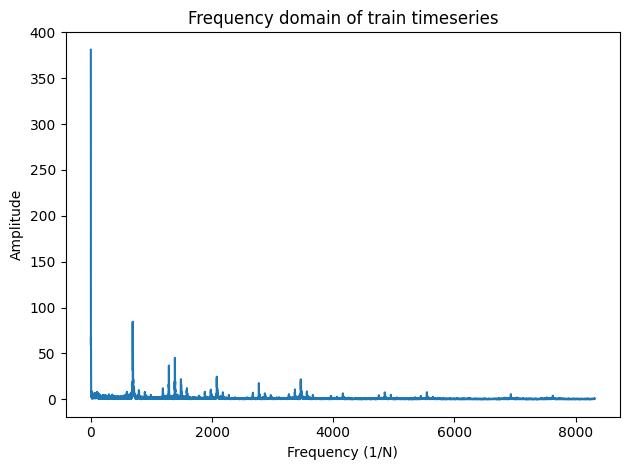

In [39]:
# Calculate the number of samples in the timeseries
N = len(train)

# Compute the Fourier transform of the timeseries
train_ft = np.fft.fft(train['cnt'])

# Compute the magnitude of the frequencies
magnitude = 2.0/N * np.abs(train_ft[:N//2])

# Plot the constituent frequencies
plt.plot(magnitude)
plt.xlabel('Frequency (1/N)')
plt.ylabel('Amplitude')
plt.title("Frequency domain of train timeseries")

#plt.xlim(0, 2000)
plt.tight_layout()
plt.show()

#### 3.2.2 Leg uit hoe het werkt en wat er is gevonden

1460 = 12 uurlijks

730 = dagelijk

104 = weekelijks

2 = jaarlijks


### 3.2.3 Onderzoek naar trends

#### 3.2.4 Leg uit hoe het werkt en wat er is gevonden

### 3.2.5 Onderzoek naar cycli en autocorrelatie

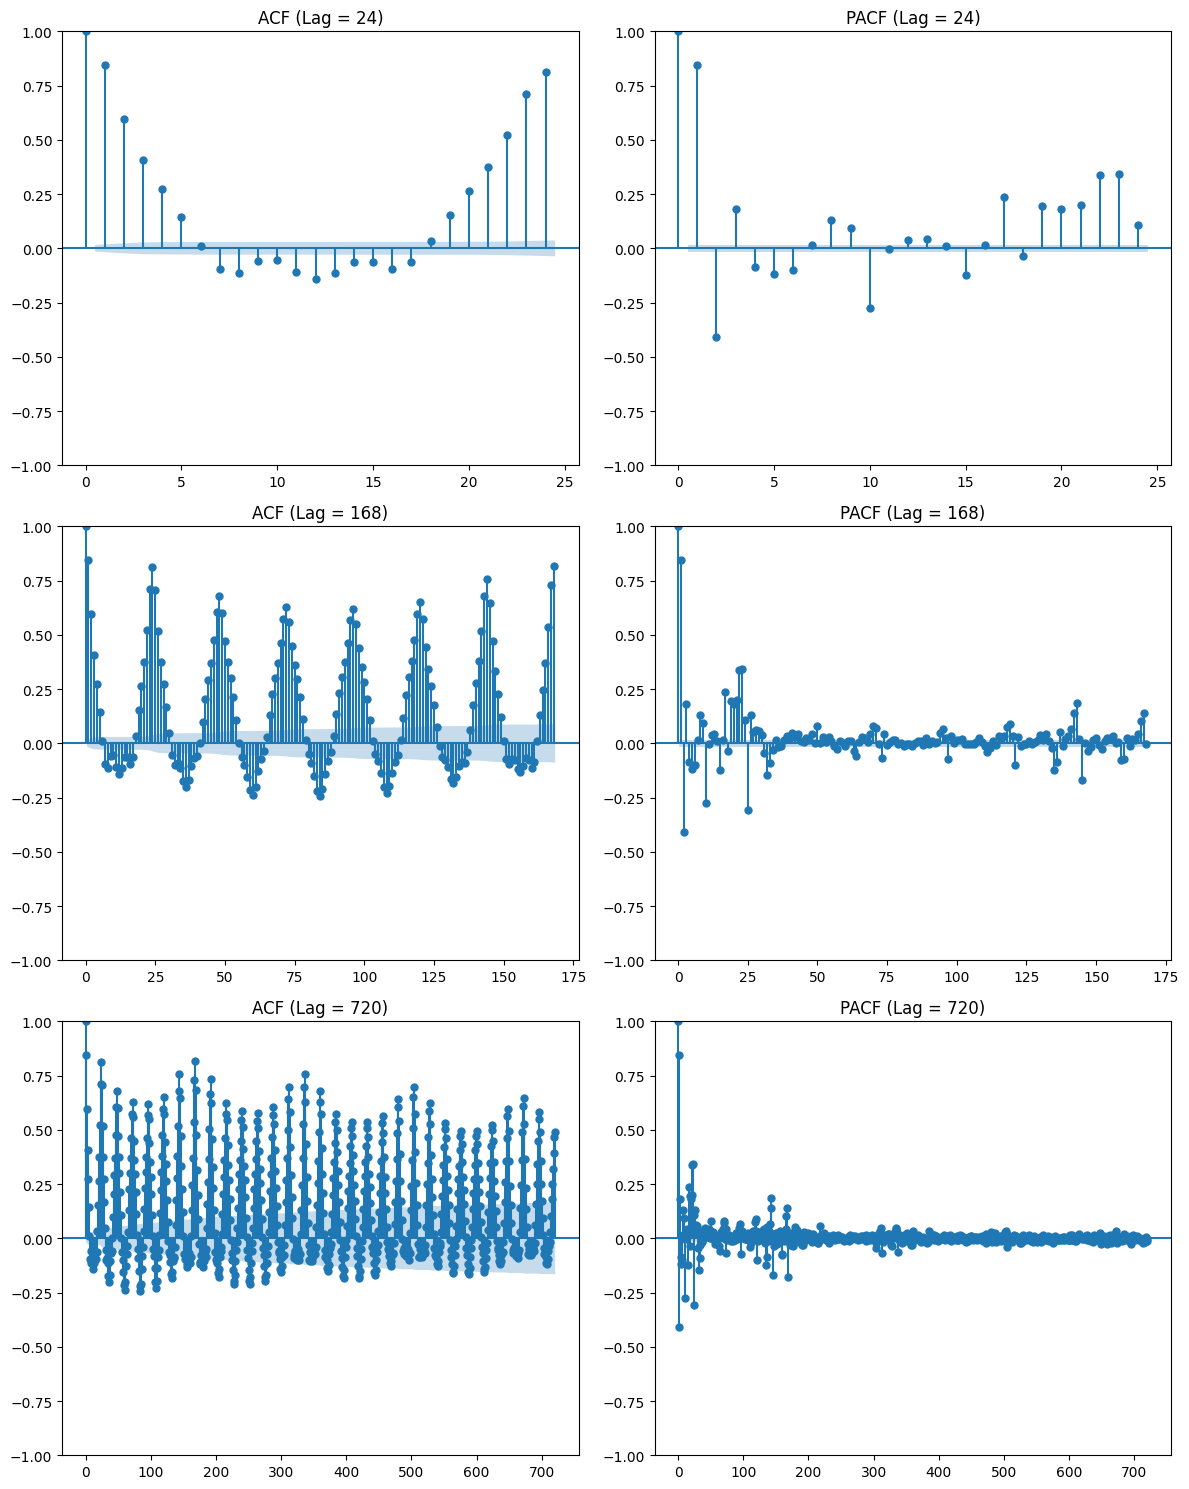

In [48]:
lags = [24, 168, 720]

fig, axes = plt.subplots(len(lags), 2, figsize=(12, 15))

for i, lag in enumerate(lags):
    tsaplots.plot_acf(train_decomp, lags=lag, ax=axes[i, 0])
    axes[i, 0].set_title(f'ACF (Lag = {lag})')

    tsaplots.plot_pacf(train_decomp, lags=lag, ax=axes[i, 1], method='ywm')
    axes[i, 1].set_title(f'PACF (Lag = {lag})')

plt.tight_layout()
plt.show()

#### 3.2.6 Leg uit hoe het werkt en wat er is gevonden

### 3.2.7 Onderzoek naar andere tijdsgebaseerde features

*denk hier bijvoorbeeld aan:

- lags: Vertragingen in de tijd (bijv. de waarde van vorige dag).
- Rolling statistics: Gemiddelden of varianties over een bepaald venster.
- Datumgerelateerde features: Dag van de week, maand, seizoenen, feestdagen, enz.

#### 3.2.8 Leg uit hoe het werkt en wat er is gevonden

## 3.3 Maak duidelijk hoe jullie tot de uiteindelijke keuze voor de features en model(len) zijn gekomen. Wat is er allemaal geprobeerd?

# 4. Train-test splitsing en validatie

*Cross-validation voor time series: Bij time series data kun je geen willekeurige splitsing gebruiken. Gebruik TimeSeriesSplit uit scikit-learn om met opeenvolgende perioden te valideren, of werk met 'rolling' en 'expanding' vensters.

## 4.1 splits de data

## 4.2 Cross-validation voor time series

### 4.2.1 Leg uit waarom dit anders is voor time series

# 5. Modelleren

# **Hou bij welke hyperparameters je gebruikt voor elke kaggle submission voor 6.3**

## 5.1 Model 1 waar je time series combineert met reguliere feautures (Lineaire regressie)?

### 5.1.1 Vind de beste hyperparameters, gebruik hier eventueel gridsearch en pipelines

### 5.1.2 Geef toelichting in de werking van het model en de gekozen parameters

### 5.1.3 Pas het model toe op de testset en upload het resultaat op Kaggle

## 5.2 Model 2 waar je time series combineert met reguliere feautures (Ensemble)?

### 5.2.1 Vind de beste hyperparameters, gebruik hier eventueel gridsearch en pipelines

### 5.2.2 Geef toelichting in de werking van het model en de gekozen parameters

### 5.2.3 Pas het model toe op de testset en upload het resultaat op Kaggle

## 5.3 Model 3 waar je time series combineert met reguliere feautures?

### 5.3.1 Vind de beste hyperparameters, gebruik hier eventueel gridsearch en pipelines

### 5.3.2 Geef toelichting in de werking van het model en de gekozen parameters

### 5.3.3 Pas het model toe op de testset en upload het resultaat op Kaggle

## 5.4 Model 4 waar je time series combineert met reguliere feautures

### 5.4.1 Vind de beste hyperparameters, gebruik hier eventueel gridsearch en pipelines

### 5.4.2 Geef toelichting in de werking van het model en de gekozen parameters

### 5.4.3 Pas het model toe op de testset en upload het resultaat op Kaggle

## 5.5 Model 5 waar je time series combineert met reguliere feautures

### 5.5.1 Vind de beste hyperparameters, gebruik hier eventueel gridsearch en pipelines

### 5.5.2 Geef toelichting in de werking van het model en de gekozen parameters

### 5.5.3 Pas het model toe op de testset en upload het resultaat op Kaggle

## 5.6 Model 1 van specifieke tijdseriemodellen (SARIMA(X))

### 5.6.1 Vind de beste hyperparameters, gebruik hier eventueel gridsearch en pipelines

### 5.6.2 Geef toelichting in de werking van het model en de gekozen parameters

### 5.6.3 Pas het model toe op de testset en upload het resultaat op Kaggle

## 5.7 Model 2 van specifieke tijdseriemodellen

### 5.7.1 Vind de beste hyperparameters, gebruik hier eventueel gridsearch en pipelines

### 5.7.2 Geef toelichting in de werking van het model en de gekozen parameters

### 5.7.3 Pas het model toe op de testset en upload het resultaat op Kaggle

## 5.8 Model 1 van hybdride modellen

### 5.8.1 Vind de beste hyperparameters, gebruik hier eventueel gridsearch en pipelines

### 5.8.2 Geef toelichting in de werking van het model en de gekozen parameters

### 5.8.3 Pas het model toe op de testset en upload het resultaat op Kaggle

# 6. Bevindingen

## 6.1 Geef een beknopt overzicht van de resultaten

## 6.2 Welke model presteert het beste? Welke parameters gebruikte deze?

## 6.3 Toon je scores op Kaggle en laat zien wat de resultaten waren van verbeteringen op je score op Kaggle

# 7. Conclusie en aanbevelingen

## 7.1 welke features hadden uiteindelijk het meeste invloed op de voorspelling?

## 7.2 Sluit dit aan op de EDA?

## 7.3 Welk advies kun je op basis hiervan geven aan de verhuurder?

## 7.4 Welk model zou je adviseren aan de verhuurder? Waarom? Is dit per definitie het model met de beste voorspellingen of zijn  er ook andere overwegingen? Zo ja, welke?